# 1. Skeleton-based video model

In [39]:
import os, sys
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from torchvision.io import VideoReader


sys.path.append("..")
from src.viz_utils import plot_images

In [40]:
videos_root_dir = "../data/source_penn/videos"
video_ids = ["0003.mp4", "1300.mp4", "1806.mp4", "2200.mp4"]

In [41]:
sample_video_path = os.path.join(videos_root_dir, video_ids[3])
reader = VideoReader(sample_video_path, "video")

e:\Documents\innova\interview_prep\veesion\.venv\Lib\site-packages\torchvision\io\_video_deprecation_warning.py:5: UserWarning: The video decoding and encoding capabilities of torchvision are deprecated from version 0.22 and will be removed in version 0.24. We recommend that you migrate to TorchCodec, where we'll consolidate the future decoding/encoding capabilities of PyTorch: https://github.com/pytorch/torchcodec
  warnings.warn(


In [42]:
## Plot sample frames

# Load every 10th frame and plot using subplots

reader = reader.seek(0)
frames = []
for frame_idx, frame in enumerate(reader):
    if frame_idx % 10 == 0:
        frames.append(frame["data"].permute(1, 2, 0))

e:\Documents\innova\interview_prep\veesion\.venv\Lib\site-packages\torchvision\io\video_reader.py:242: UserWarning: Accurate seek is not implemented for pyav backend
  warnings.warn("Accurate seek is not implemented for pyav backend")


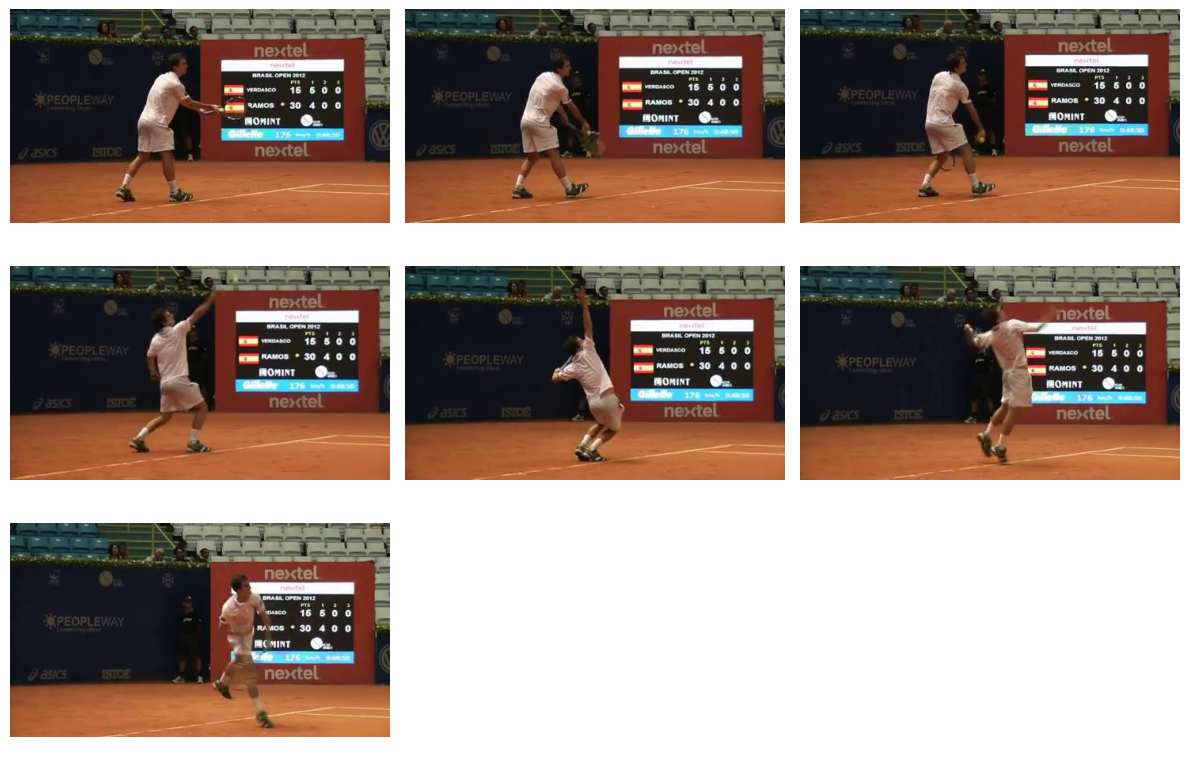

In [43]:
plot_images(frames)

## Pose detection using mediapipe

In [44]:
from src.models_setup import get_model_path

base_options = python.BaseOptions(model_asset_path=get_model_path())
options = vision.PoseLandmarkerOptions(
    base_options=base_options,)
detector = vision.PoseLandmarker.create_from_options(options)

In [45]:
frames_detection_result = [detector.detect(mp.Image(image_format=mp.ImageFormat.SRGB, data=frame.numpy())) for frame in frames]

In [46]:
from src.viz_utils import draw_landmarks_on_image
annotated_frames = [draw_landmarks_on_image(frames[i].numpy(), frames_detection_result[i]) for i in range(len(frames))]

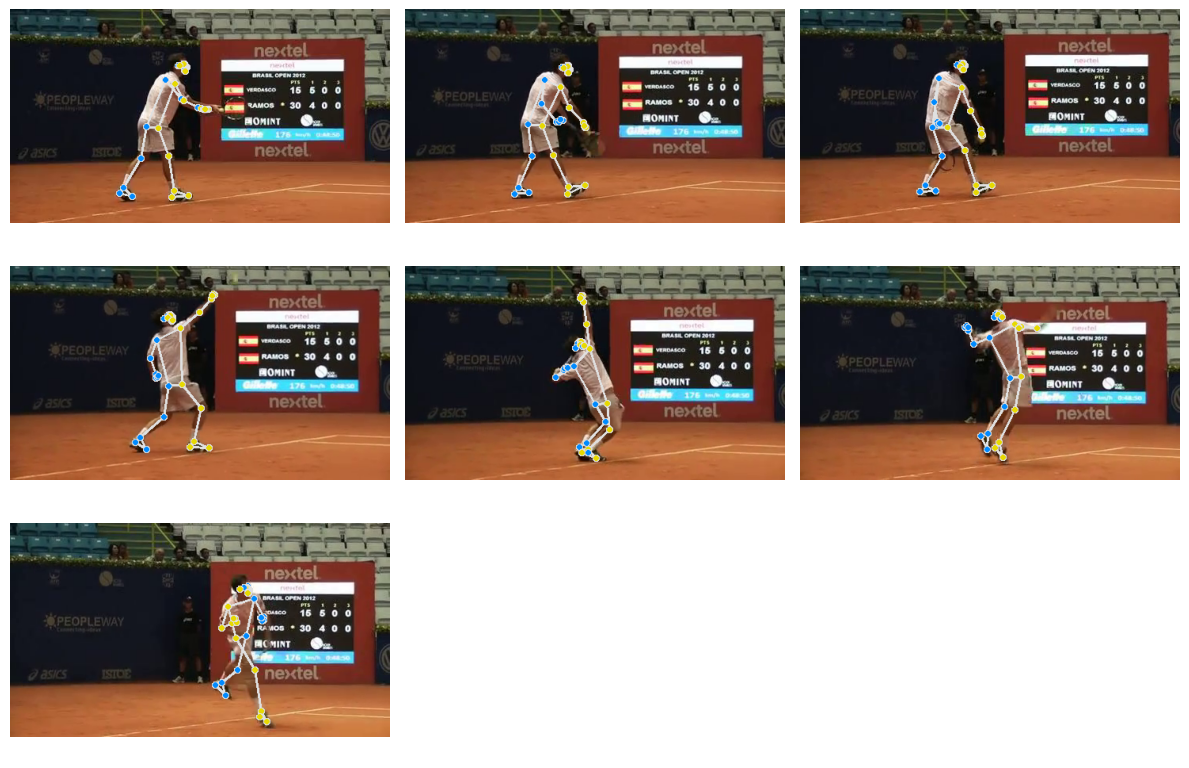

In [47]:
plot_images(annotated_frames)